### 一、常用智能推荐算法
        智能推荐用于联系用户和信息，并利用信息分析用户的兴趣偏好，为用户推荐感兴趣信息。
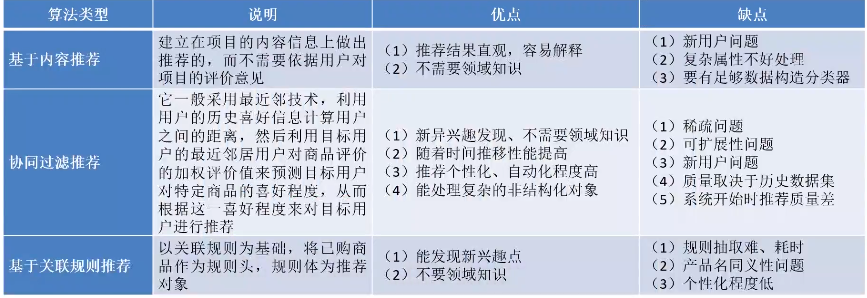
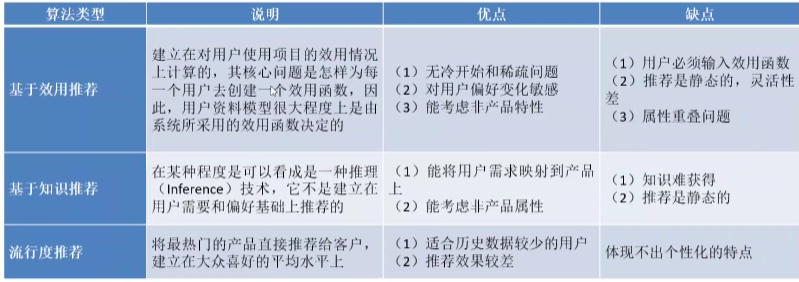

### 二、智能推荐模型评价
#### 1.推荐列表评价指标

        通常网站给用户进行推荐时，针对每个用户提供的是一个个性化的推荐列表，也称为TopN推荐。TopN推荐最常用的评价指标是精确率、召回率和F1值。
- 精确率

        精确率表示推荐列表中用户喜欢的物品所占的比例。单个用户u的推荐精确率定义如下：
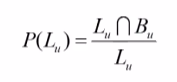

        整个推荐系统的精确率定义如下：

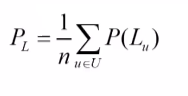

- 召回率
        召回率表示测试集中用户喜欢的物品出现在推荐列表中的比例。单个用户u的推荐召回率定义如下：

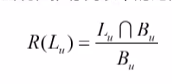

        整个推荐系统的召回率定义如下：

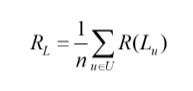

- F1值（F1 score）

        F1值是综合了精确率（P）和召回率（R）的评价方法，F1值取值 越高表明推荐算法越有效，F1值定义如下：

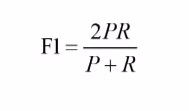

#### 2.评分预测评价指标
评分预测是指预测一个用户对推荐的物品的评分。评分预测的预测准确度通过均方根误差（RMSE）和评价绝对误差（MAE）进行评价。    
对于测试集T中的用户u和物品i，定义用户u对物品i的实际评分为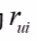，推荐算法的预测评分为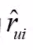，则RMSE的定义如下：
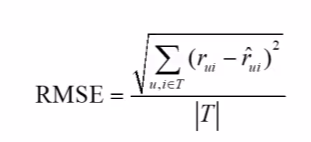
MAE使用绝对值计算，定义如下：
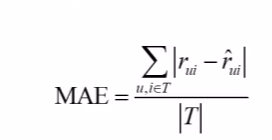

### 三、基于内容推荐
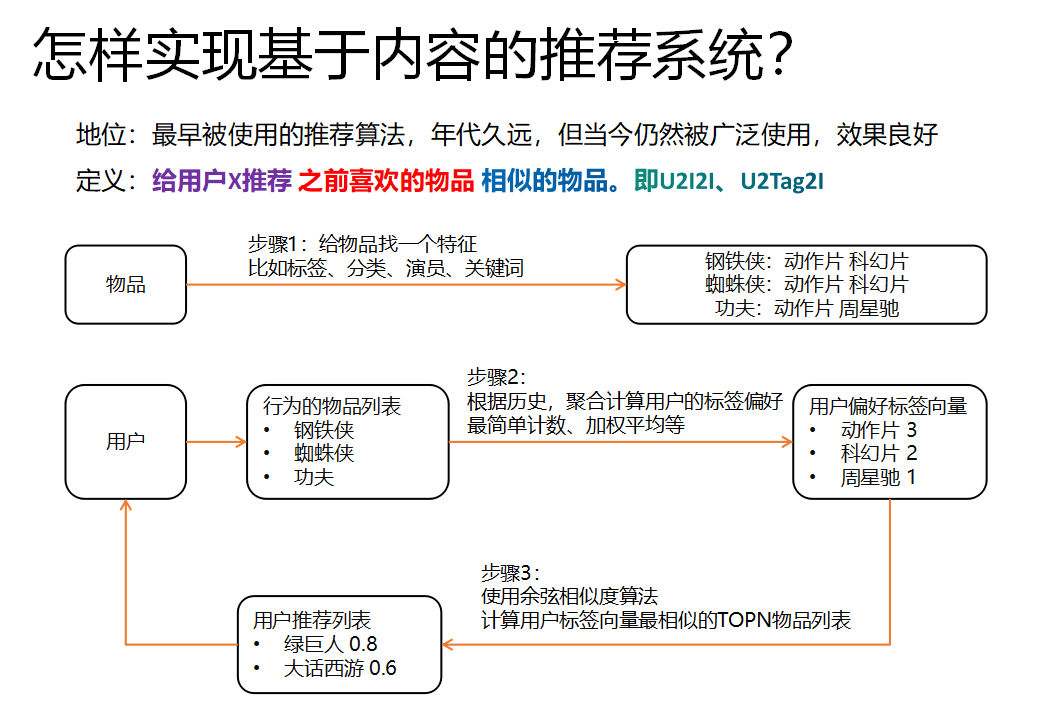
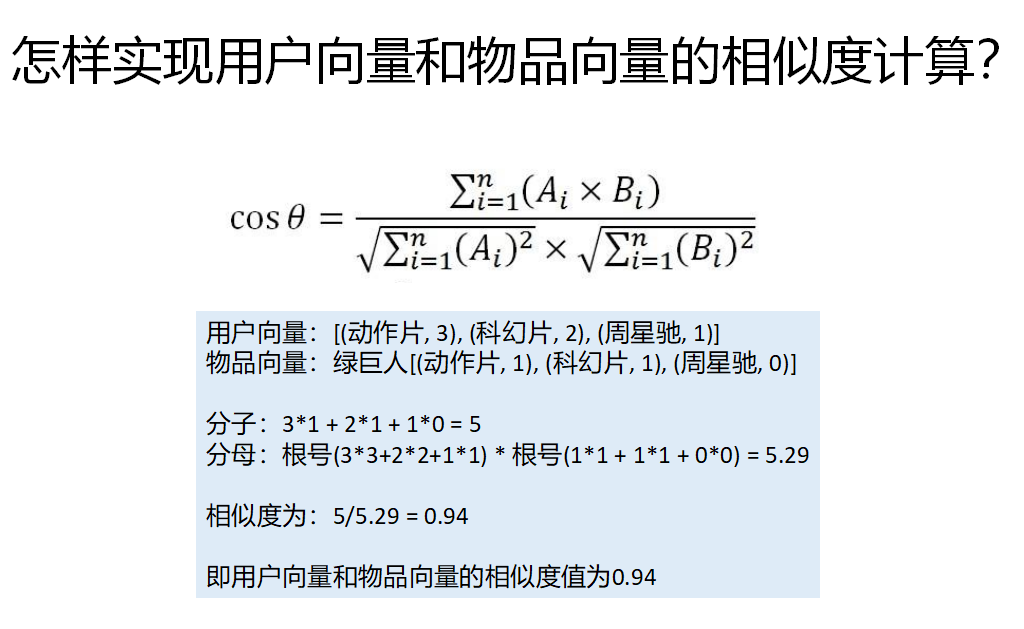


### 四、协同过滤推荐算法
#### 1.基于用户的协同过滤算法
        基于用户的协同过滤算法的基本思想是基于用户对物品的偏好找到相邻用户，然后将邻居用户喜欢的物品推荐给当前用户。
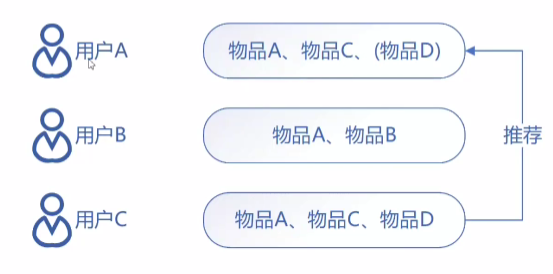

算法步骤：
- 计算用户之间的相似度
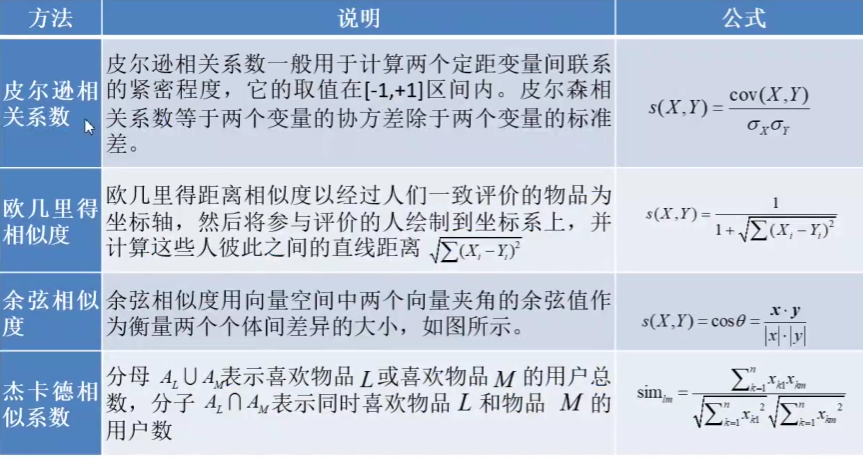
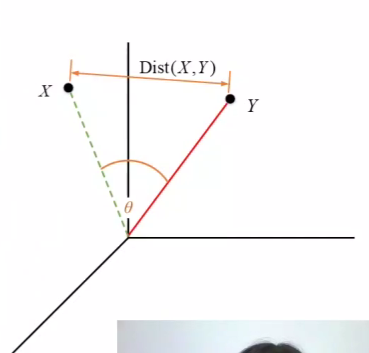

- 预测评分    
首先根据上一步中的相似度计算，寻找用户u的邻居集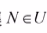，其中N表示邻居集，u表示用户集。然后结合用户评分数据集，预测用户u对项i的评分，计算公式如下：    
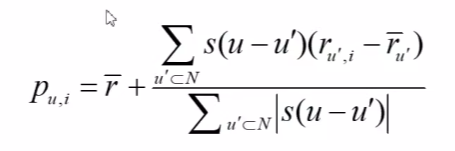    
其中，表示用户u和用户u'的相似度。    
最后，对未评分商品的预测分值排序，得到推荐商品列表。


#### 2.例子
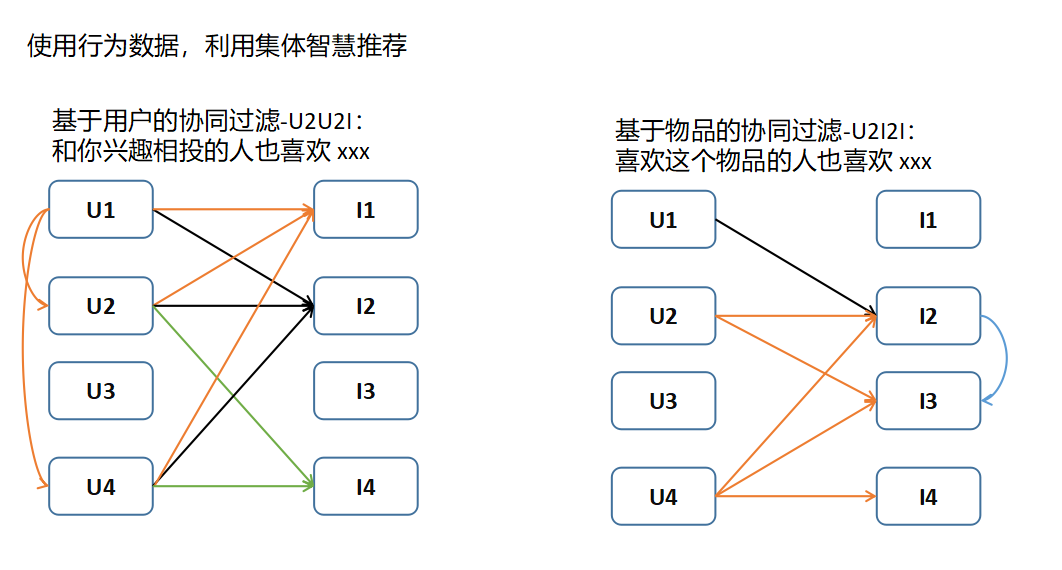
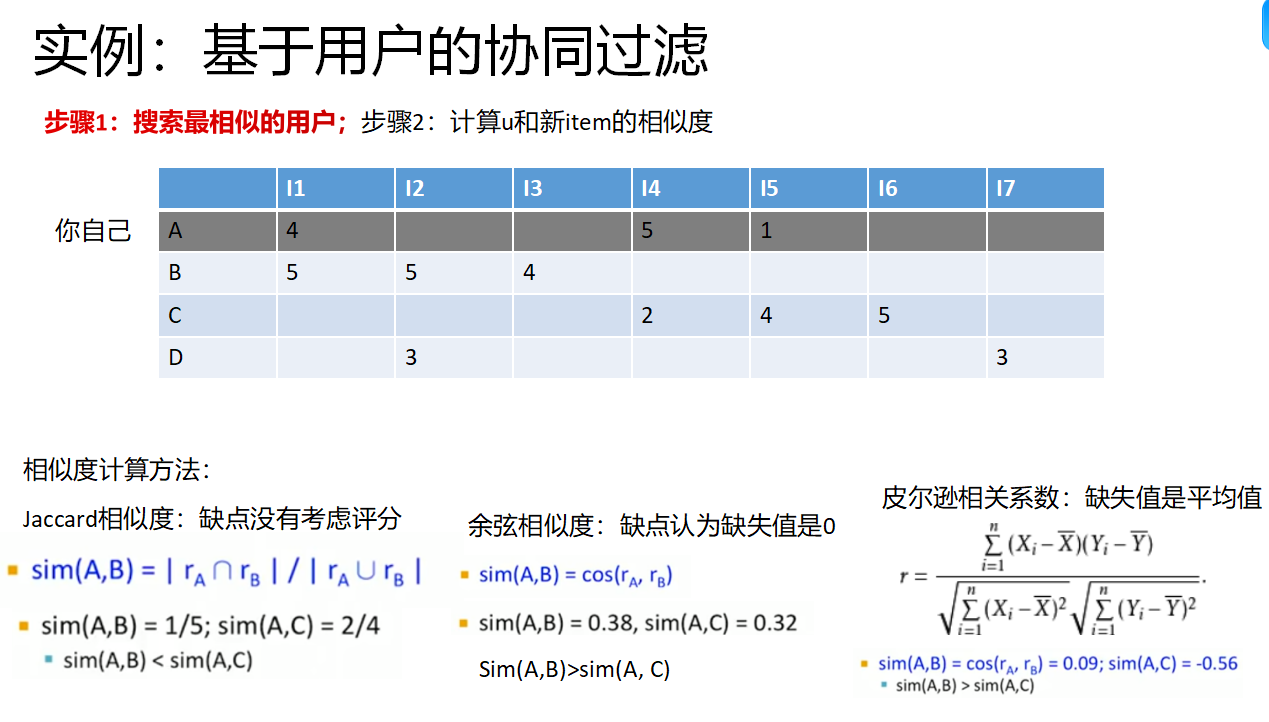
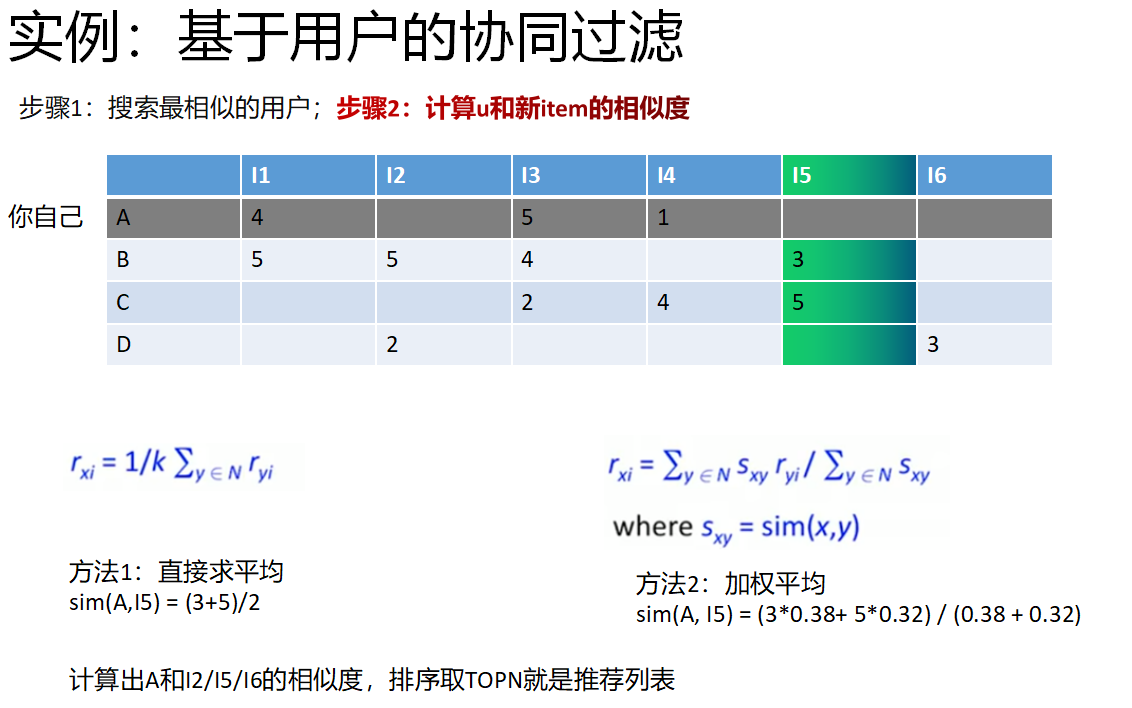

#### 2.基于物品的协同过滤算法
        基于物品的协同过滤算法的原理和基于用户的协同过滤类似，只是在计算邻居时采用物品本身，而不是从用户的角度，即基于用户对物品的偏好找到相似的物品，再根据用户的历史偏好，推荐相似的物品给用户。
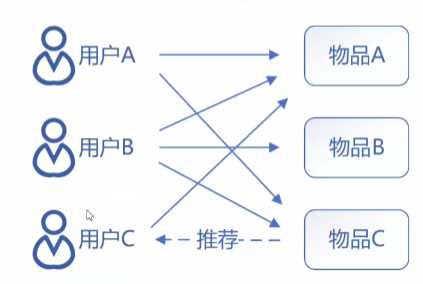

算法步骤：
- 计算物品之间的相似度    
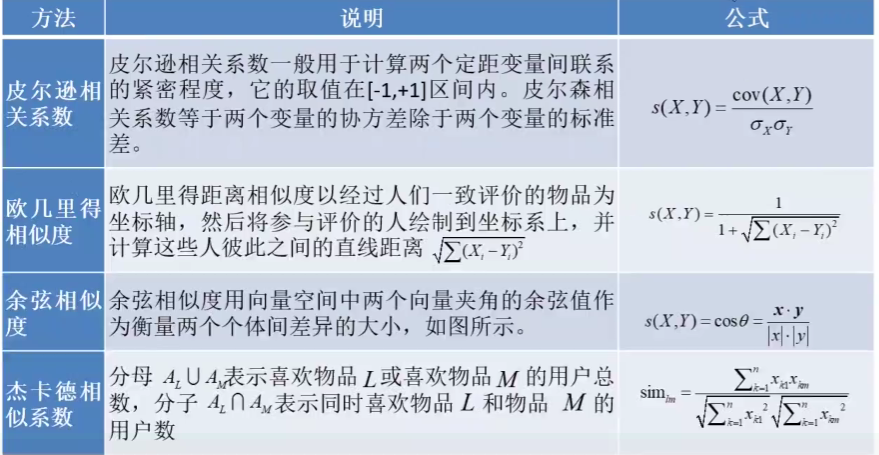
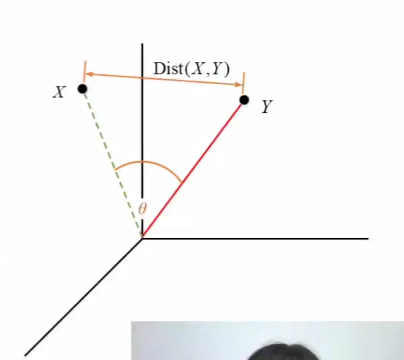    

基于物品的协同过滤算法中用户对所有物品的感兴趣程度计算公式为：
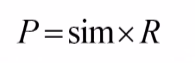    
其中，R表示用户对物品的兴趣，sim表示所有物品之间的相似度，P为用户对物品感兴趣的程度。    
最好，根据用户对物品的感兴趣程度排序，得到推荐商品列表。



### 五、基于流行度的推荐算法
        对于用户行为数据信息过少的用户，可以使用基于流行度的推荐算法；为这些用户推荐最热门的前N个新闻，等信息数据收集到一定数量时，在切换为个性化推荐。

### 六、代码实现

#### 1.基于用户的协同过滤推荐

##### (1)读取数据

In [1]:
import pandas as pd

In [2]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
user_data = pd.read_csv('../data/u.data', 
                 sep='\t', 
                 names=columns)

user_data


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


##### (2)创建用户物品矩阵

In [3]:
train_df=pd.pivot(user_data,index='user_id',columns='item_id',values='rating')

In [4]:
train_df.fillna(0,inplace=True)
train_df=train_df.head(400)

##### (3)计算用户之间的相似度

In [5]:
from sklearn.metrics import pairwise_distances
s_data=1-pairwise_distances(train_df.values,metric='jaccard')
s_data=pd.DataFrame(s_data,index=(train_df.index),columns=(train_df.index))
s_data

f:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


user_id,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.056962,0.025157,0.024221,0.217984,0.248062,0.273585,0.114478,0.017301,0.203166,...,0.183735,0.126471,0.232877,0.234604,0.100334,0.051613,0.116418,0.240223,0.260128,0.010309
2,0.056962,1.000000,0.084112,0.088608,0.021552,0.132780,0.040268,0.052174,0.076923,0.069565,...,0.076471,0.161074,0.062500,0.034314,0.133333,0.094340,0.071895,0.054054,0.046703,0.150685
3,0.025157,0.084112,1.000000,0.200000,0.004386,0.039216,0.031603,0.066038,0.027027,0.034783,...,0.054217,0.170213,0.050209,0.020101,0.088235,0.102041,0.114286,0.004444,0.038997,0.151515
4,0.024221,0.088608,0.200000,1.000000,0.010152,0.026201,0.028916,0.106667,0.045455,0.019608,...,0.074074,0.088710,0.028322,0.029762,0.080000,0.083333,0.058824,0.010309,0.023881,0.150000
5,0.217984,0.021552,0.004386,0.010152,1.000000,0.122093,0.214286,0.109005,0.020725,0.108025,...,0.076364,0.047619,0.182163,0.222642,0.099526,0.040909,0.065385,0.188356,0.225806,0.005102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.051613,0.094340,0.102041,0.083333,0.040909,0.043307,0.052995,0.018018,0.000000,0.025862,...,0.100629,0.044304,0.084233,0.068421,0.110000,1.000000,0.040000,0.036697,0.071839,0.055556
397,0.116418,0.071895,0.114286,0.058824,0.065385,0.190114,0.127232,0.141844,0.068966,0.201681,...,0.179894,0.157609,0.089109,0.091304,0.119718,0.040000,1.000000,0.151261,0.090674,0.050847
398,0.240223,0.054054,0.004444,0.010309,0.188356,0.285235,0.255459,0.100000,0.031915,0.308824,...,0.236287,0.092664,0.169811,0.158845,0.085308,0.036697,0.151261,1.000000,0.171838,0.000000


##### (4)预测评分

In [8]:
test_df=pd.pivot(user_data,index='user_id',columns='item_id',values='rating')
test_df.fillna(0,inplace=True)
test_df=test_df[430:]

In [9]:
from UCF import UCF_rec
import warnings
warnings.filterwarnings('ignore')
rec_pre=UCF_rec(train_df,test_df,s_data,40)
print(rec_pre)

Empty DataFrame
Columns: []
Index: []


##### (5)评分

In [11]:
from sklearn.metrics import mean_absolute_error

MAE=[]
for u in test_df.index:
    try:
        tmp=pd.concat([rec_pre.loc[[u]],test_df.loc[[u]]]).dropna(axis=1)
        MAE.append(mean_absolute_error(tmp.iloc[0,:],tmp.iloc[1,:]))
    except:
        pass

In [13]:
import numpy as np 
print(f'推荐模型评分的均方误差：{np.mean(MAE)}')

推荐模型评分的均方误差：nan


#### 2.基于物品的协同过滤推荐

#### 3.基于流行度的推荐